In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import occSimFuncs as occFunc
from scipy.interpolate import interp1d

%matplotlib inline

In [3]:
fn = '/Users/tom/Dropbox/TIC5/ctl.csv'
header = [
        'RA', 'DEC', 'ECLONG', 'ECLAT', 'V', 'Ks',
              'TESSMAG', 'TEFF', 'RADIUS', 'MASS', 'CONTRATIO', 'PRIORITY',
    ]
usecols = [13, 14, 30, 60, 64, 87, 70, 72, 84, 26, 27, 46]
df = pd.read_csv(fn, names=header, usecols=usecols)

In [4]:
df['noise_level'] = occFunc.component_noise(df.TESSMAG, readmod=1, zodimod=1)

In [5]:
def interp_sectors(ecllat):
    fn = 'sectors.txt'
    sectors = np.genfromtxt(fn, unpack=True)
    deg = sectors[0]
    avesectors = sectors[4]
    
    f1 = interp1d(deg, avesectors)
    return f1(ecllat)



In [6]:
p = df.RADIUS**-(3/2) / df.noise_level * interp_sectors(df.ECLAT)**0.5
p2 = df.RADIUS**-(5/2) / df.noise_level * interp_sectors(df.ECLAT)**0.5

/Users/tom/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


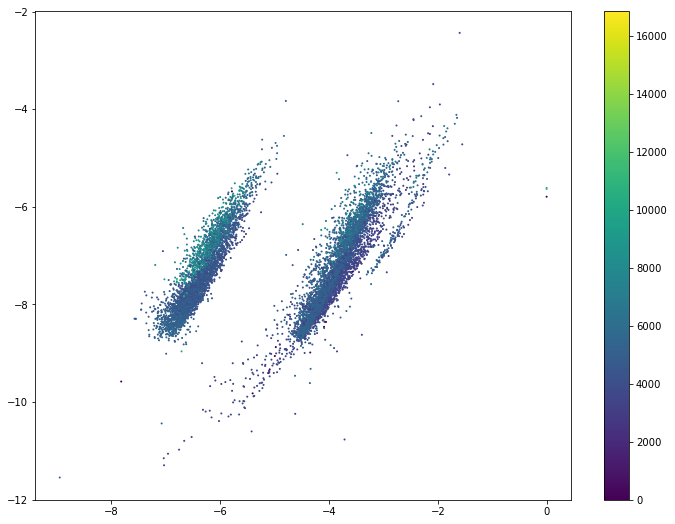

In [7]:
plt.figure(figsize=[12,9])

plt.scatter(np.log(df.PRIORITY[::1000]),np.log(p[::1000]), s=1, c=df.TEFF[::1000])
# plt.xlim(0,0.2)
# plt.ylim(0,0.02)
plt.colorbar()

(array([  1.68770000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.00000000e+01,   1.24000000e+02,   1.78000000e+02,
          1.24500000e+03,   5.90300000e+03,   1.59440000e+04,
          4.36590000e+04,   1.00534000e+05,   1.71277000e+05,
          2.11912000e+05,   2.12527000e+05,   2.17197000e+05,
          2.40688000e+05,   2.79380000e+05,   1.87552000e+05,
          1.50718000e+05,   1.93324000e+05,   2.31603000e+05,
          2.65598000e+05,   2.90330000e+05,   3.08803000e+05,
          3.23205000e+05,   3.52217000e+05,   4.09362000e+05,
        

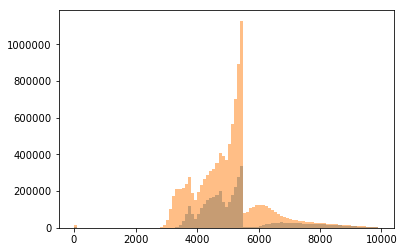

In [8]:
plt.hist(df.loc[np.log(df.PRIORITY) < -6,'TEFF'],alpha=0.5,bins=np.arange(0,10000,100))
plt.hist(df.loc[:,'TEFF'],alpha=0.5, bins=np.arange(0,10000,100))

(array([  4.62400000e+03,   2.95300000e+03,   1.82200000e+03,
          7.50000000e+02,   2.98000000e+02,   1.28000000e+02,
          6.90000000e+01,   3.00000000e+01,   2.60000000e+01,
          1.90000000e+01,   2.00000000e+01,   1.40000000e+01,
          8.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
         0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
         0.18,  0.19]),
 <a list of 19 Patch objects>)

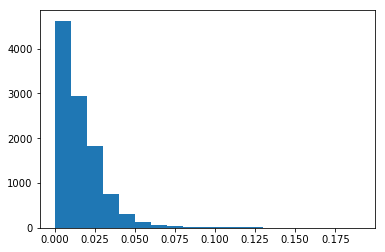

In [9]:
plt.hist(df.PRIORITY.values[::1000], bins=np.arange(0,0.2,0.01))

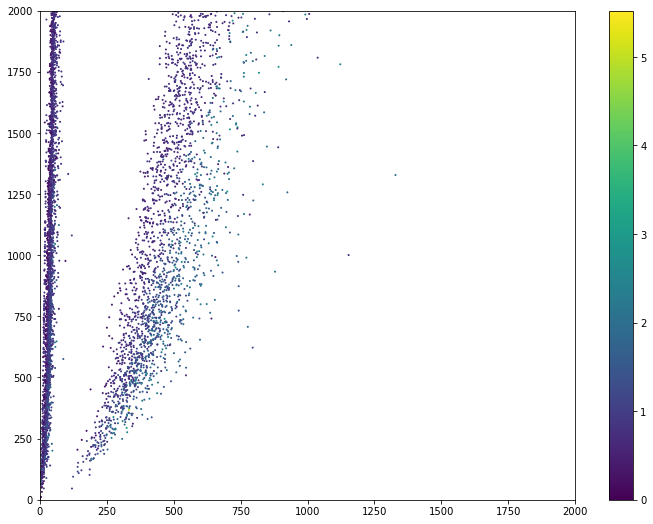

In [10]:
plt.figure(figsize=[12,9])

plt.scatter(df.PRIORITY[::1000]**-1,p[::1000]**-1, s=1, c=df.MASS[::1000])
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.colorbar()

(array([  3.22200000e+03,   2.95300000e+03,   1.27000000e+02,
          5.60000000e+01,   8.50000000e+01,   1.46000000e+02,
          2.48000000e+02,   3.14000000e+02,   3.51000000e+02,
          3.52000000e+02,   3.66000000e+02,   3.72000000e+02,
          3.45000000e+02,   3.34000000e+02,   3.21000000e+02,
          2.83000000e+02,   2.25000000e+02,   1.69000000e+02,
          1.39000000e+02,   1.04000000e+02,   7.30000000e+01,
          5.90000000e+01,   4.00000000e+01,   3.30000000e+01,
          2.30000000e+01,   2.00000000e+01,   8.00000000e+00,
          9.00000000e+00,   3.00000000e+00,   6.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00]),
 array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
         550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
        1100, 1150, 1200, 1250, 1300, 1350, 

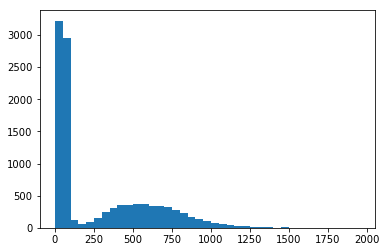

In [11]:
plt.hist(df.PRIORITY[::1000]**-1, bins = np.arange(0,2000,50))

In [12]:
select = np.argsort(p.values)[-170000::]
select2 = np.argsort(p2.values)[-170000::]
oldselect = np.argsort(df.PRIORITY.values)[-170000::]

(array([   229.,    491.,    776.,   1375.,   2220.,   3143.,   4288.,
          5282.,   6712.,   9344.,  13655.,  19603.,  10007.,  13694.,
         19597.,  19082.,  13845.,   8077.,   2719.,   1616.,   1061.]),
 array([  6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,  10. ,
         10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,  14. ,  14.5,
         15. ,  15.5,  16. ,  16.5]),
 <a list of 21 Patch objects>)

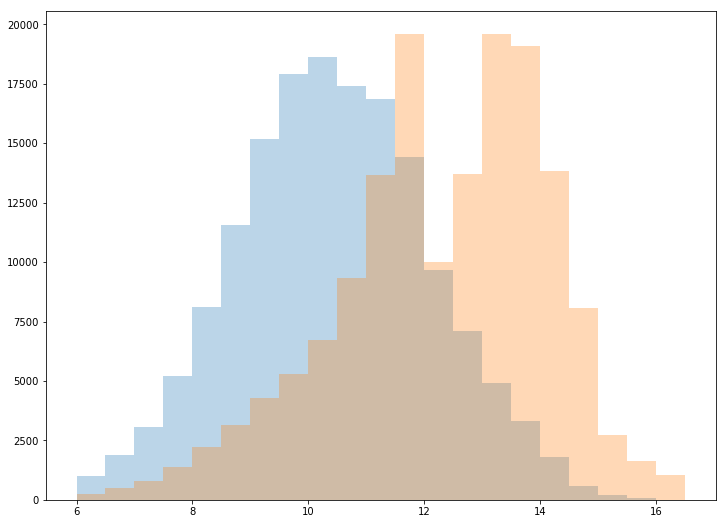

In [15]:
plt.figure(figsize=[12,9])

plt.hist(df.TESSMAG[select],bins=np.arange(6,17,0.5),alpha=0.3)
plt.hist(df.TESSMAG[oldselect],bins=np.arange(6,17,0.5), alpha=0.3)
# plt.hist(df.TESSMAG[select2],bins=np.arange(6,17,0.5), alpha=0.3)

(array([  1.03490000e+04,   2.49990000e+04,   3.63530000e+04,
          2.97750000e+04,   1.55240000e+04,   1.01020000e+04,
          7.52200000e+03,   8.56300000e+03,   9.18000000e+03,
          6.76900000e+03,   4.52200000e+03,   2.92800000e+03,
          1.47800000e+03,   8.21000000e+02,   4.58000000e+02,
          2.71000000e+02,   1.77000000e+02,   9.80000000e+01,
          6.20000000e+01,   2.80000000e+01,   1.10000000e+01,
          1.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9]),
 <a list of 29 Patch objects>)

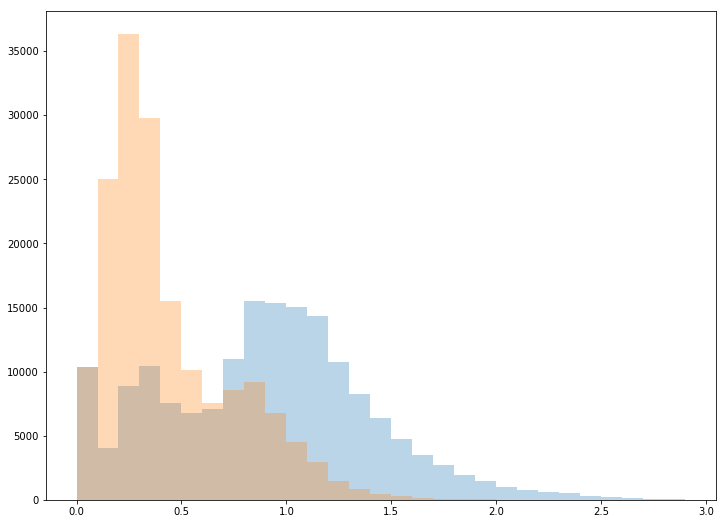

In [14]:
plt.figure(figsize=[12,9])

plt.hist(df.RADIUS[select],bins=np.arange(0,3,0.1),alpha=0.3)
# plt.hist(df.RADIUS[oldselect],bins=np.arange(0,3,0.1), alpha=0.3)
plt.hist(df.RADIUS[select2],bins=np.arange(0,3,0.1), alpha=0.3)